In [2]:
import numpy
from flexon_ken_memo_optimization import run_whole_beamline, get_surface_from_basis_and_coefficients
from srxraylib.plot.gol import plot

from scipy import optimize
import time

[-69.875 -69.745 -69.615 ...  69.615  69.745  69.875]


/home/ejr/miniconda3/lib/python3.7/site-packages/srxraylib/plot/gol.py:349: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111)


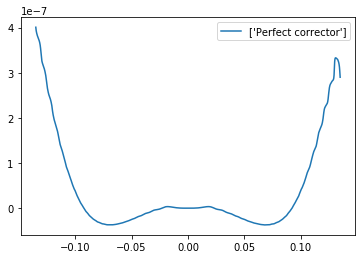

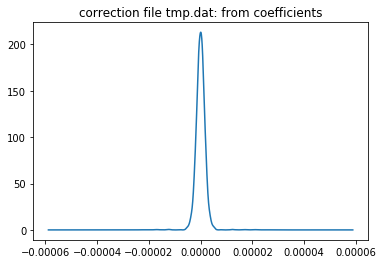

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fd648d28150>)

In [3]:
## Original Scripts (Perfectly Corrected) ##
############################################

output_wavefront = run_whole_beamline(error_file_M1="deformation.dat",
                                      correction_file_M3="correction.dat")


input_array = numpy.loadtxt("aps_axo_influence_functions2019.dat")
abscissas = input_array[:, 0].copy()
basis = numpy.loadtxt("aps_axo_orthonormal_functions2019.dat")

print(abscissas)

aaa = numpy.loadtxt('correction.dat')

x = aaa[:,0]
height = aaa[:,1]

#height0 = get_surface_from_basis_and_coefficients(basis,coefficients)
#print(">>>>height0",height0.shape)
#print(">>>>>", height0.size)

## Interpolate here
#x = numpy.linspace(-0.135,0.135,100)
#height = numpy.interp(x,abscissas/1000,height0)
plot(x,height*1.0, legend=["Perfect corrector"])

## Final beam
plot(output_wavefront.get_abscissas(), output_wavefront.get_intensity(), title="correction file tmp.dat: from coefficients")



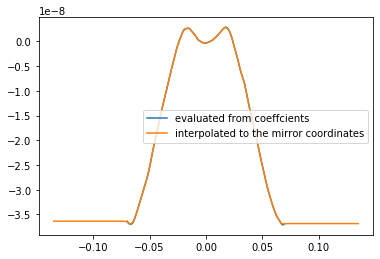

100


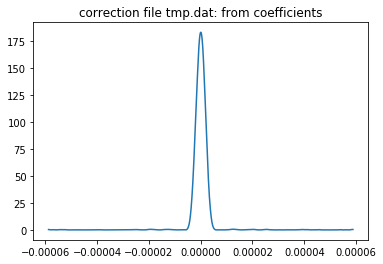

The max value is  182.98075999838457
The true max val  212.97657172329227
Max, no correction  111.43902895363388


In [4]:


coefficients = [-1.34111718e-08, 2.89091778e-11, 4.55787593e-07, 3.71667246e-08, \
 1.03623232e-07, 3.30400686e-08, -3.41480067e-09, 5.67368681e-10, \
 -1.08934818e-08, -1.67860465e-08, -9.94266810e-09, -1.41912905e-08, \
 -1.32628413e-08, -1.36259836e-08, -9.41153403e-09, -9.47141468e-09, \
 -5.08842152e-09, -6.38382702e-10, -5.57004604e-09, -2.95162052e-09, ]

#coefficients = numpy.random.random(20) * 1e-9

height0 = get_surface_from_basis_and_coefficients(basis,coefficients)
#print(">>>>height0",height0.shape)
#print(">>>>>", height0.size)

## Interpolate here
x = numpy.linspace(-0.135,0.135,100)
height = numpy.interp(x,abscissas/1000,height0)
plot(abscissas/1000,height0,x,height*1.0, legend=["evaluated from coeffcients","interpolated to the mirror coordinates"])

print((x.size))

f = open("tmp.dat",'w')
for i in range(x.size):
    f.write("%g %g \n"%(x[i],height[i]))
f.close()

#correction_file_M3 = numpy.loadtxt("tmp.dat")

#print(height0)
#print(correction_file_M3)

output_wavefront = run_whole_beamline(error_file_M1="deformation.dat",
                   correction_file_M3="tmp.dat")

#print(output_wavefront.get_intensity())

plot(output_wavefront.get_abscissas(), output_wavefront.get_intensity(), title="correction file tmp.dat: from coefficients")

maxVal = numpy.amax(output_wavefront.get_intensity())
maxValTrue = 212.97657172329227             # From earlier testing
maxValNoCorrection = 111.43902895363388     # From earlier testing
print('The max value is ', maxVal)
print('The true max val ', maxValTrue)
print('Max, no correction ', maxValNoCorrection)

In [5]:
## Define function to minimize/maximize ##
##########################################

def get_corrector_profile(coefficients):
    # This function takes as input the 1 by 20 list of M1 correction coefficients
    # and returns the maximum intensity of the beamline corrected by the
    # coefficients. The negative of the intensity is returned so that the
    # minimization algorithms chosen will optimize with respect to the max
    # intensity.

    ## Load data and basis
    #input_array = numpy.loadtxt("aps_axo_influence_functions2019.dat")
    abscissas = input_array[:, 0].copy()
    #basis = numpy.loadtxt("aps_axo_orthonormal_functions2019.dat")

    ## Get height values and interpolate grid
    height0 = get_surface_from_basis_and_coefficients(basis, coefficients)
    x = numpy.linspace(-0.135, 0.135, 100)
    height = numpy.interp(x, abscissas / 1000, height0)
    #print(">>>>>", height.size)
    # plot(abscissas/1000,height0,x,height*1.0, legend=["evaluated from coeffcients","interpolated to the mirror coordinates"])

    ## Write data in tmp file and assign to correction file
    f = open("tmp.dat", 'w')
    for i in range(x.size):
        f.write("%g %g \n" % (x[i], height[i]))
    f.close()
    correction_file_M3 = "tmp.dat"

    ## Run correcton
    output_wavefront = run_whole_beamline(error_file_M1="deformation.dat",
                                          correction_file_M3="tmp.dat")


    ## Get max intensity ##
    #######################
    maxIntensity = numpy.amax(output_wavefront.get_intensity())
    #maxIntensityTrue = 212.97657172329227  # The optimally corrected max
                                            # intensity from earlier testing

    #print(maxIntensityTrue - maxIntensity)
    return(-maxIntensity)

In [8]:
## Check some values ##
#######################
    



In [11]:
#coefficients = [-1.34111718e-08, 2.89091778e-11, 4.55787593e-07, 3.71667246e-08, \
# 1.03623232e-07, 3.30400686e-08, -3.41480067e-09, 5.67368681e-10, \
# -1.08934818e-08, -1.67860465e-08, -9.94266810e-09, -1.41912905e-08, \
# -1.32628413e-08, -1.36259836e-08, -9.41153403e-09, -9.47141468e-09, \
# -5.08842152e-09, -6.38382702e-10, -5.57004604e-09, -2.95162052e-09, ]

numpy.random.seed(1234)
coefficients = numpy.random.random(20) * 1e-7

54.72015976905823
Max fun eval is -184.75610046905186
[ 2.69778660e-10  6.54014362e-07  4.48703911e-07  2.89476191e-08
  1.14802815e-07  4.32397109e-08  2.15960845e-08 -9.56207146e-09
 -5.03920892e-09 -6.23352673e-09 -5.02847105e-10 -2.08707770e-08
 -1.70921122e-08 -3.09334142e-09 -1.15617512e-08  1.17821168e-08
  1.60413071e-09 -4.59796496e-09 -3.58725337e-08 -6.26873908e-08]


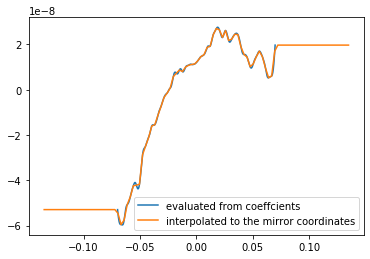

Max intensity after NM minimizing is: 184.75610046905186


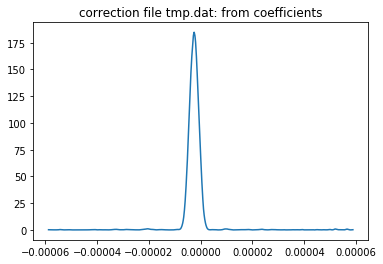

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fd6485c3050>)

In [25]:
## Nelder Mean optimization ##
##############################

start_time = time.time()
resNM = optimize.minimize(get_corrector_profile, coefficients, method='nelder-mead',options = {'maxiter':5000,'fatol':1e-4, 'xatol':1e-4,'disp':True})
NMtime = time.time() - start_time
print(NMtime)

print('Max fun eval is', resNM.fun)
print(resNM.x)
coefficientsNM = resNM.x

## maxiter = 100 yields 183.753 in 134 fevals

height0 = get_surface_from_basis_and_coefficients(basis,coefficientsNM)
#print(">>>>height0",height0.shape)
#print(">>>>>", height0.size)

## Interpolate here
x = numpy.linspace(-0.135,0.135,100)
height = numpy.interp(x,abscissas/1000,height0)
plot(abscissas/1000,height0,x,height*1.0, legend=["evaluated from coeffcients","interpolated to the mirror coordinates"])


f = open("tmpNM.dat",'w')
for i in range(x.size):
    f.write("%g %g \n"%(x[i],height[i]))
f.close()

correction_file_M3 = "tmpNM.dat"

output_wavefront = run_whole_beamline(error_file_M1="deformation.dat",
                   correction_file_M3="tmpNM.dat")

maxValNM = numpy.amax(output_wavefront.get_intensity())
print('Max intensity after NM minimizing is:', maxValNM)

plot(output_wavefront.get_abscissas(), output_wavefront.get_intensity(), title="correction file tmp.dat: from coefficients")


7.453005790710449
Max fun eval is -186.383354468306
[ 1.91534189e-08  1.81228881e-08  4.57784152e-07  3.81400696e-08
  9.95669412e-08  2.72520200e-08 -1.47621314e-08 -4.82532893e-09
 -8.39076799e-09 -2.52939619e-08 -1.93627105e-08 -3.37741463e-08
 -2.41609286e-08  7.51319901e-09  1.31689835e-09 -3.29034560e-08
  1.54598203e-08 -6.49480151e-09 -6.04202944e-08 -4.34402821e-08]


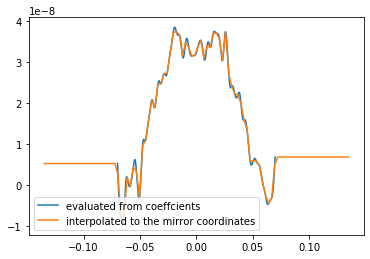

tmpBFGS.dat
Max intensity after BFGS minimizing is: 186.383354468306


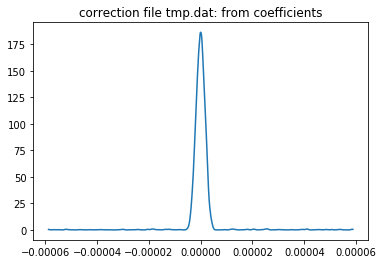

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fd6485e1490>)

In [23]:
## bfgs (Broyden-Fletcher-Goldfarb-Shanno) ##
#############################################

start_time = time.time()
resBFGS = optimize.minimize(get_corrector_profile, coefficients, method='L-BFGS-B',options = {'maxiter':5000,'ftol':1e-4, 'gtol':1e-4,'disp':True})
BFGStime = time.time() - start_time
print(BFGStime)

print('Max fun eval is', resBFGS.fun)
print(resBFGS.x)
coefficientsBFGS = resBFGS.x

height0 = get_surface_from_basis_and_coefficients(basis,coefficientsBFGS)

## Interpolate here
x = numpy.linspace(-0.135,0.135,100)
height = numpy.interp(x,abscissas/1000,height0)
plot(abscissas/1000,height0,x,height*1.0, legend=["evaluated from coeffcients","interpolated to the mirror coordinates"])

f = open("tmpBFGS.dat",'w')
for i in range(x.size):
    f.write("%g %g \n"%(x[i],height[i]))
f.close()

correction_file_M3 = "tmpBFGS.dat"
print(correction_file_M3)

output_wavefront = run_whole_beamline(error_file_M1="deformation.dat",
                   correction_file_M3="tmpBFGS.dat")

maxValBFGS = numpy.amax(output_wavefront.get_intensity())
print('Max intensity after BFGS minimizing is:', maxValBFGS)

plot(output_wavefront.get_abscissas(), output_wavefront.get_intensity(), title="correction file tmp.dat: from coefficients")


In [24]:
print(resBFGS)

      fun: -186.383354468306
 hess_inv: <20x20 LbfgsInvHessProduct with dtype=float64>
      jac: array([-1.19927451e+03,  1.30324151e+05,  1.12421015e+06,  1.55093036e+06,
        6.14729385e+05,  4.46373356e+05,  5.56492151e+05,  2.52623120e+05,
        3.59758026e+04, -2.50609420e+05,  1.17074804e+06,  7.35731351e+05,
        1.42972739e+06,  1.05144771e+06, -2.11864008e+05, -1.59448495e+05,
       -1.12364943e+05,  6.80727095e+05, -1.63811148e+06,  2.18027511e+06])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 861
      nit: 11
   status: 0
  success: True
        x: array([ 1.91534189e-08,  1.81228881e-08,  4.57784152e-07,  3.81400696e-08,
        9.95669412e-08,  2.72520200e-08, -1.47621314e-08, -4.82532893e-09,
       -8.39076799e-09, -2.52939619e-08, -1.93627105e-08, -3.37741463e-08,
       -2.41609286e-08,  7.51319901e-09,  1.31689835e-09, -3.29034560e-08,
        1.54598203e-08, -6.49480151e-09, -6.04202944e-08, -4.34402821e-08])


Optimization terminated successfully.
         Current function value: -174.519373
         Iterations: 2
         Function evaluations: 1528
11.92716646194458
[ 3.60803402e+00 -1.89844508e-01 -3.24170681e-04 -5.50543331e-06
 -2.81839222e-05 -2.35234393e-06 -7.37123176e-06 -7.05233238e-06
 -2.73676898e-06 -3.16345191e-06 -3.29563480e-06 -2.31994097e-06
 -2.62644240e-06  7.12963221e-08 -4.96232550e-07 -1.02003853e-05
 -1.92571424e-05 -1.32092859e-05 -2.01918973e-06 -3.26983695e-06]


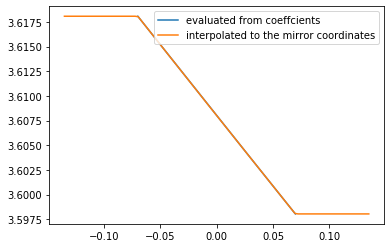

tmpPow.dat
Max intensity after Pow minimizing is: 174.51937316809784


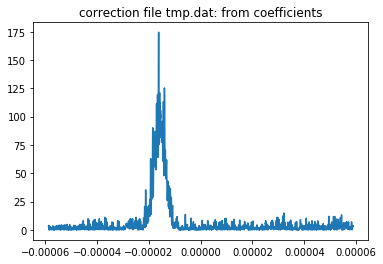

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fd648836790>)

In [26]:
## Powell method ##
###################

start_time = time.time()
resPow = optimize.minimize(get_corrector_profile, coefficients, method='Powell',options = {'maxiter':5000,'ftol':1e-4, 'xtol':1e-4,'disp':True})
Powtime = time.time() - start_time
print(Powtime)

print(resPow.x)
coefficientsPow = resPow.x

height0 = get_surface_from_basis_and_coefficients(basis,coefficientsPow)

## Interpolate here
x = numpy.linspace(-0.135,0.135,100)
height = numpy.interp(x,abscissas/1000,height0)
plot(abscissas/1000,height0,x,height*1.0, legend=["evaluated from coeffcients","interpolated to the mirror coordinates"])

f = open("tmpPow.dat",'w')
for i in range(x.size):
    f.write("%g %g \n"%(x[i],height[i]))
f.close()

correction_file_M3 = "tmpPow.dat"
print(correction_file_M3)

output_wavefront = run_whole_beamline(error_file_M1="deformation.dat",
                   correction_file_M3="tmpPow.dat")

maxValPow = numpy.amax(output_wavefront.get_intensity())
print('Max intensity after Pow minimizing is:', maxValPow)

plot(output_wavefront.get_abscissas(), output_wavefront.get_intensity(), title="correction file tmp.dat: from coefficients")

## maxiter = 100 yields  188.756 and 2745 fucntion evals 
## tol = 1e-4 yields 188.755 and 2745 function evals

123.74134087562561
                        fun: -176.64330126611787
 lowest_optimization_result:       fun: -176.64330126611787
 hess_inv: array([[ 1.01440898e+00, -3.31188767e-03,  1.26648441e-02,
        -1.54931120e-02,  2.12078819e-02, -3.45217546e-03,
         2.68561623e-02, -2.79546179e-02, -7.39036774e-03,
         2.44343256e-02,  2.94520813e-02, -2.13512719e-02,
         4.14510948e-02, -3.68632195e-03,  2.39431818e-02,
         3.67233203e-02, -5.98517486e-02, -2.87175332e-02,
        -6.59418030e-03,  1.03803420e-02],
       [-3.31188767e-03,  1.53322639e-01,  3.43880107e-02,
         5.44661221e-02, -6.43973934e-02,  4.11560100e-02,
         7.57916171e-02,  9.67878189e-03, -8.40241839e-02,
         5.36287759e-02,  1.51162088e-01, -5.34176318e-02,
         1.72416113e-01,  8.77570767e-02,  3.36741387e-02,
         4.08479639e-02,  7.58590662e-02,  2.73175782e-02,
        -1.07821345e-01, -1.53203572e-01],
       [ 1.26648441e-02,  3.43880107e-02,  3.94968211e-02,
        

/home/ejr/miniconda3/lib/python3.7/site-packages/srxraylib/plot/gol.py:349: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111)


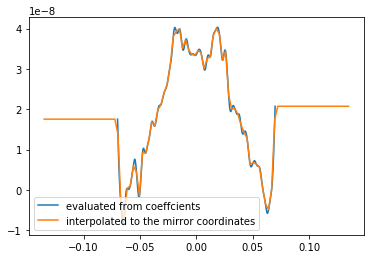

Max intensity after Basinhopping minimizing is: 176.64330126611787


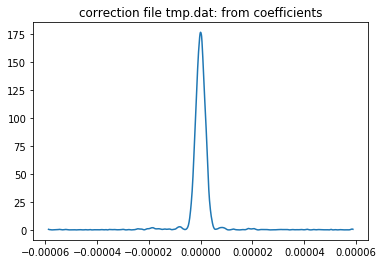

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fd648599350>)

In [29]:
## Basinhopping mmethod ##
##########################

start_time = time.time()
resBH = optimize.basinhopping(get_corrector_profile, coefficients, niter = 10)
BHtime = time.time() - start_time
print(BHtime)

print(resBH)
coefficientsBH = resBH.x

height0 = get_surface_from_basis_and_coefficients(basis,coefficientsBH)

## Interpolate here
x = numpy.linspace(-0.135,0.135,100)
height = numpy.interp(x,abscissas/1000,height0)
plot(abscissas/1000,height0,x,height*1.0, legend=["evaluated from coeffcients","interpolated to the mirror coordinates"])

f = open("tmpBH.dat",'w')
for i in range(x.size):
    f.write("%g %g \n"%(x[i],height[i]))
f.close()

correction_file_M3 = "tmpBH.dat"

output_wavefront = run_whole_beamline(error_file_M1="deformation.dat",
                   correction_file_M3="tmpBH.dat")

maxValBH = numpy.amax(output_wavefront.get_intensity())
print('Max intensity after Basinhopping minimizing is:', maxValBH)

plot(output_wavefront.get_abscissas(), output_wavefront.get_intensity(), title="correction file tmp.dat: from coefficients")

## niter = 1, no kwargs: returns

8.185354232788086
[-8.50131032e-08 -5.17493071e-08  4.63022575e-07  3.21970063e-08
  1.08638551e-07  3.87300317e-08  6.75005260e-10 -4.84057284e-09
 -1.97184415e-08 -1.37140398e-08 -1.39246389e-08 -3.62132135e-08
 -2.31476845e-08  1.59991766e-08  1.42378777e-08 -3.57376192e-08
  1.02914971e-08 -3.18420398e-09 -5.86859120e-08 -5.16689522e-08]


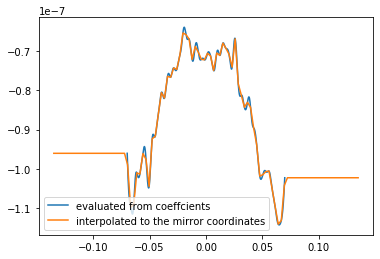

Max intensity after Nevergrad minimizing is: 187.0739996478386


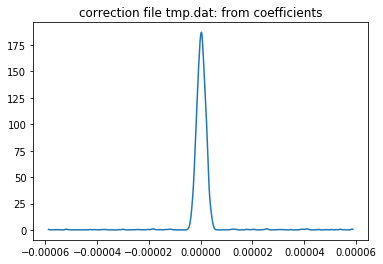

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fd63dd99290>)

In [37]:
import nevergrad as ng

start_time = time.time()

optimizer = ng.optimizers.OnePlusOne(parametrization = 20, budget = 1000)
recommendation = optimizer.minimize(get_corrector_profile)
NGtime = time.time() - start_time
print(NGtime)

print(recommendation.value)
coefficientsNG = recommendation.value

height0 = get_surface_from_basis_and_coefficients(basis,coefficientsNG)

## Interpolate here
x = numpy.linspace(-0.135,0.135,100)
height = numpy.interp(x,abscissas/1000,height0)
plot(abscissas/1000,height0,x,height*1.0, legend=["evaluated from coeffcients","interpolated to the mirror coordinates"])

f = open("tmpNG.dat",'w')
for i in range(x.size):
    f.write("%g %g \n"%(x[i],height[i]))
f.close()

correction_file_M3 = "tmpNG.dat"

output_wavefront = run_whole_beamline(error_file_M1="deformation.dat",
                   correction_file_M3="tmpNG.dat")

maxValNG = numpy.amax(output_wavefront.get_intensity())
print('Max intensity after Nevergrad minimizing is:', maxValNG)

plot(output_wavefront.get_abscissas(), output_wavefront.get_intensity(), title="correction file tmp.dat: from coefficients")


In [33]:
print(sorted(ng.optimizers.registry.keys()))


['ASCMA2PDEthird', 'ASCMADEQRthird', 'ASCMADEthird', 'AlmostRotationInvariantDE', 'BO', 'CM', 'CMA', 'CMandAS', 'CMandAS2', 'CMandAS3', 'CauchyLHSSearch', 'CauchyOnePlusOne', 'CauchyScrHammersleySearch', 'Cobyla', 'DE', 'DiagonalCMA', 'DiscreteOnePlusOne', 'DoubleFastGADiscreteOnePlusOne', 'EDA', 'ES', 'FCMA', 'HaltonSearch', 'HaltonSearchPlusMiddlePoint', 'HammersleySearch', 'HammersleySearchPlusMiddlePoint', 'LHSSearch', 'LargeHaltonSearch', 'LhsDE', 'MEDA', 'MPCEDA', 'MetaRecentering', 'MixES', 'MultiCMA', 'MultiScaleCMA', 'MutDE', 'NGO', 'NaiveIsoEMNA', 'NaiveTBPSA', 'NelderMead', 'NoisyBandit', 'NoisyDE', 'NoisyDiscreteOnePlusOne', 'NoisyOnePlusOne', 'ORandomSearch', 'OScrHammersleySearch', 'OnePlusOne', 'OptimisticDiscreteOnePlusOne', 'OptimisticNoisyOnePlusOne', 'PBIL', 'PCEDA', 'PSO', 'ParaPortfolio', 'Portfolio', 'Powell', 'QORandomSearch', 'QOScrHammersleySearch', 'QrDE', 'RCobyla', 'RPowell', 'RSQP', 'RandomSearch', 'RandomSearchPlusMiddlePoint', 'RealSpacePSO', 'RecES', 'Re

(6_w,12)-aCMA-ES (mu_w=3.7,w_1=40%) in dimension 20 (seed=<module 'time' (built-in)>, Tue Mar 17 13:45:41 2020)
45.81453323364258
[ 5.93154007 -6.54807305 -2.26942119  1.85132323 -0.13299591  1.17895624
  0.04844625  1.95262117 -0.76879226 -2.64197749 -1.80740478  6.47382929
  1.94660611  3.88627829 -2.237432    7.92566823  4.78164159  1.52118848
 -2.26077431 -1.69712934]


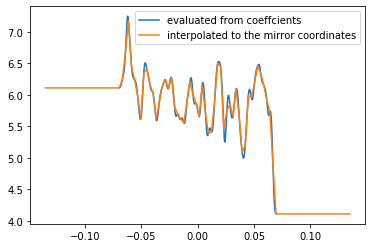

Max intensity after Nevergrad minimizing is: 123.61264115407606


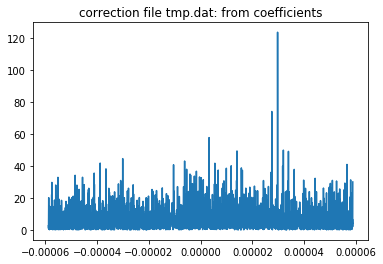

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fd63cfa8710>)

In [48]:
import nevergrad as ng

start_time = time.time()

optimizer = ng.optimizers.CM(parametrization = 20, budget = 5000)
recommendation = optimizer.minimize(get_corrector_profile)
NGtime = time.time() - start_time
print(NGtime)

print(recommendation.value)
coefficientsNG = recommendation.value

height0 = get_surface_from_basis_and_coefficients(basis,coefficientsNG)

## Interpolate here
x = numpy.linspace(-0.135,0.135,100)
height = numpy.interp(x,abscissas/1000,height0)
plot(abscissas/1000,height0,x,height*1.0, legend=["evaluated from coeffcients","interpolated to the mirror coordinates"])

f = open("tmpNG.dat",'w')
for i in range(x.size):
    f.write("%g %g \n"%(x[i],height[i]))
f.close()

correction_file_M3 = "tmpNG.dat"

output_wavefront = run_whole_beamline(error_file_M1="deformation.dat",
                   correction_file_M3="tmpNG.dat")

maxValNG = numpy.amax(output_wavefront.get_intensity())
print('Max intensity after Nevergrad minimizing is:', maxValNG)

plot(output_wavefront.get_abscissas(), output_wavefront.get_intensity(), title="correction file tmp.dat: from coefficients")


4.229142904281616
[-1.92169366e-07 -5.09803871e-08  4.32949398e-07  2.99111774e-08
  7.07348220e-08  4.84829783e-08 -3.22239665e-09 -1.88248396e-08
 -5.63316639e-08 -3.86257524e-08 -2.44626398e-08 -1.01879844e-07
 -4.60264780e-08 -1.13535692e-08  3.44733012e-08 -3.19118359e-08
  5.12791764e-08  5.41810174e-08 -4.72377883e-08 -4.11157594e-08]


/home/ejr/miniconda3/lib/python3.7/site-packages/srxraylib/plot/gol.py:349: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111)


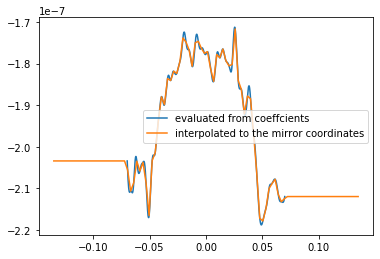

Max intensity after Nevergrad minimizing is: 182.56469384105972


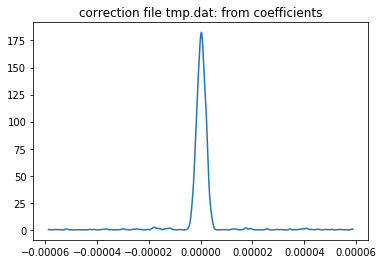

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fbaf130cad0>)

In [13]:
import nevergrad as ng

start_time = time.time()

optimizer500 = ng.optimizers.OnePlusOne(parametrization = 20, budget = 500)
recommendation500 = optimizer500.minimize(get_corrector_profile)

print((time.time() - start_time))

print(recommendation500.value)
coefficientsNG = recommendation500.value

height0 = get_surface_from_basis_and_coefficients(basis,coefficientsNG)

## Interpolate here
x = numpy.linspace(-0.135,0.135,100)
height = numpy.interp(x,abscissas/1000,height0)
plot(abscissas/1000,height0,x,height*1.0, legend=["evaluated from coeffcients","interpolated to the mirror coordinates"])

f = open("tmpNG.dat",'w')
for i in range(x.size):
    f.write("%g %g \n"%(x[i],height[i]))
f.close()

correction_file_M3 = "tmpNG.dat"

output_wavefront = run_whole_beamline(error_file_M1="deformation.dat",
                   correction_file_M3="tmpNG.dat")

maxValNG = numpy.amax(output_wavefront.get_intensity())
print('Max intensity after Nevergrad minimizing is:', maxValNG)

plot(output_wavefront.get_abscissas(), output_wavefront.get_intensity(), title="correction file tmp.dat: from coefficients")


In [ ]:
## Check Original ##
####################

output_wavefront = run_whole_beamline(error_file_M1="deformation.dat",
                                      correction_file_M3="correction.dat")


input_array = numpy.loadtxt("aps_axo_influence_functions2019.dat")
abscissas = input_array[:, 0].copy()
basis = numpy.loadtxt("aps_axo_orthonormal_functions2019.dat")


coefficients = res.x
height0 = get_surface_from_basis_and_coefficients(basis,coefficients)
#print(">>>>height0",height0.shape)
#print(">>>>>", height0.size)

## Interpolate here
x = numpy.linspace(-0.135,0.135,100)
height = numpy.interp(x,abscissas/1000,height0)
#plot(abscissas/1000,height0,x,height*1.0, legend=["evaluated from coeffcients","interpolated to the mirror coordinates"])


f = open("tmp.dat",'w')
for i in range(x.size):
    f.write("%g %g \n"%(x[i],height[i]))
f.close()

correction_file_M3 = "tmp.dat"

output_wavefront = run_whole_beamline(error_file_M1="deformation.dat",
                   correction_file_M3="tmp.dat")

print(output_wavefront.get_intensity())

plot(output_wavefront.get_abscissas(), output_wavefront.get_intensity(), title="correction file tmp.dat: from coefficients")

maxVal = numpy.amax(output_wavefront.get_intensity())
maxValTrue = 212.97657172329227             # From earlier testing
maxValNoCorrection = 111.43902895363388     # From earlier testing
print('The max value is ', maxVal)
print('The true max val ', maxValTrue)
print('Max, no correction ', maxValNoCorrection)